# 使用 Debye 模型计算固体热容

注意到粒子数 $N$ 尽管很大，但是有限，则振动模式只有 $3N$ 种。  
即有：
$$
g(\epsilon) = 
\begin{cases}
\frac{3V}{2\hbar^3\pi^2a^3}\epsilon^2,\epsilon \le \epsilon_0\\
0,\epsilon > \epsilon_0
\end{cases}
$$
其中 $\epsilon_0$ 满足：
$$
3\cdot \frac{4}{3} \pi {\big( \frac{l\epsilon_0}{2\hbar\pi a} \big)}^3 = 3N \\
\Leftrightarrow\epsilon_0^3 = \frac{6\hbar\pi^2 a^3}{V} N
$$
从而将能级简并密度化为无量纲形式：
$$
g(\epsilon) = 9\frac N{\epsilon_0^3} \epsilon^2, \epsilon \le \epsilon_0
$$
则有：
$$
n(\epsilon) = 9\frac N{\epsilon_0^3} \frac{\epsilon^2}{e^{\frac \epsilon T} -1}, \epsilon \le \epsilon_0
$$
从而有内能：
$$
\begin{align*}
U &= 9\frac N{\epsilon_0^3}\int_0^{\epsilon_0} \frac{\epsilon^3 d\epsilon}{e^{\frac \epsilon T} -1}\\
&= 9\frac N{\epsilon_0^3} T^4 \int_0^{\frac{\epsilon_0} T} \frac{x^3 dx}{e^x -1}\\
\end{align*}
$$
做无量纲化：
$$
\begin{cases}
N = 1\\
\epsilon_0 = 1
\end{cases}
$$
则有：
$$
U = 9T^4\int_0^{\frac1 T} \frac{x^3 dx}{e^x -1}
$$

低温极限 $T\rightarrow 0$：
$$
U \rightarrow 9 T^4 \int_0^\infty \frac{x^3 dx}{e^x -1} = 54\zeta(4)\cdot T^4 \overset{recover}{\rightarrow} \frac{54\zeta(4)N}{\epsilon_0^3}\cdot T^4
$$
高温极限 $T\rightarrow \infty$:
$$
U \rightarrow 9 T^4 \int_0^{\frac1T} x^2 dx  = 3 T \overset{recover}{\rightarrow}3NT
$$

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

plt.style.use("ggplot")

In [62]:
f = lambda x : x**3/(np.exp(x) - 1)
gv = np.vectorize(lambda x: 9* x**4 * integrate.quad(f,0,1/x)[0])
gv_d = lambda x: (gv(x+1e-3)-gv(x-1e-3))/2e-3
gv_low = lambda x: 4*54*special.zeta(4)* x**4

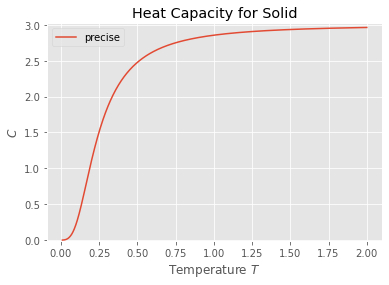

In [63]:
eps = 1e-2
T = np.linspace(eps,2,1000)

fig,ax = plt.subplots()
ax.plot(T,gv_d(T),label="precise")
#ax.plot(T,gv_low(T),label = "low temp lim")
ax.set_ylim(0-eps,3+2*eps)
ax.set_title("Heat Capacity for Solid")
ax.set_xlabel(r"Temperature $T$")
ax.set_ylabel(r"$C$")
ax.legend()

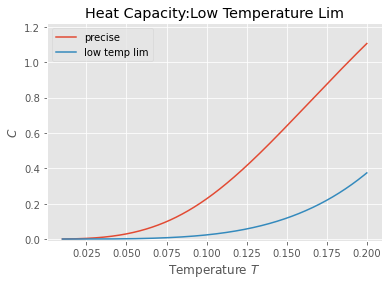

In [64]:
T = np.linspace(eps,0.2,1000)

fig,ax = plt.subplots()
ax.plot(T,gv_d(T),label="precise")
ax.plot(T,gv_low(T),label = "low temp lim")
ax.set_ylim(0-eps,1.2+2*eps)
ax.set_title("Heat Capacity:Low Temperature Lim")
ax.set_xlabel(r"Temperature $T$")
ax.set_ylabel(r"$C$")
ax.legend()

# 使用一维振子链计算固体热容

是更加贴合实际的模型：
* 自然的离散化，有限的自由度